# Destek Vektör Makineleri (Support Vector Machines)

**Regresyonundan farkı: iki farklı sınıfı, birbirlerine en yakın olan noktalarından marjin adı verilen çizgi ile ayırmak.**

**Regresyonda bu noktaları marjin içerisine almaya çalışıyorduk. Burada ise iki doğru arasına nokta almamaya çalışıyoruz. Arada kalan noktalar outlierdır.**

**Amacımız çizilen doğruları nerden çizmeliyiz? hangisi en iyi doğrudur, bunu bulmak. En fazla olan marjin aralığını bulmalıyız.**

**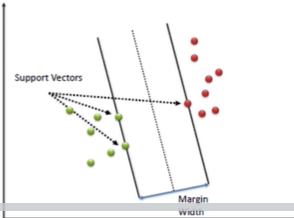**

**Bu ayrıdığımız marjinlerin üzerinde bulunan noktalara destek vektör denir.**

**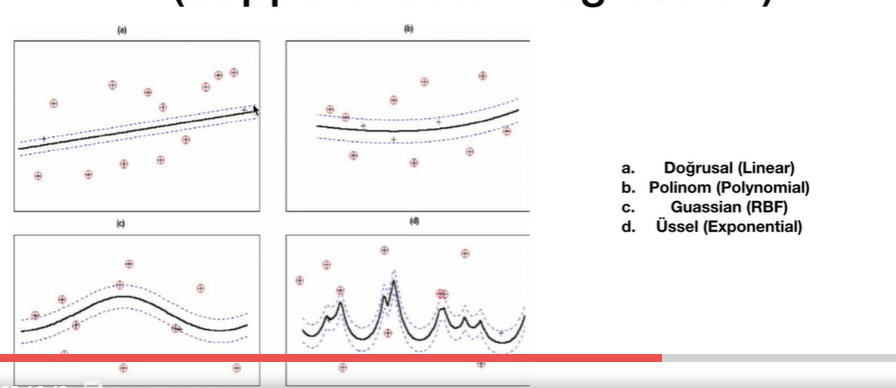**

**Görüldüğü gibi svm birden fazla fonksiyon olabilir. Olabildiğince fazla büyüklükte marjin oluşturmalı.**

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

**Diyelim 3 tane sınıf var. Bu sınıfların hepsini teker teker eşleştirerek arasında çizgi çizer. Yani 3 tane sınıf olduğu için 3 farklı sınıflandırma problemi çözer.**

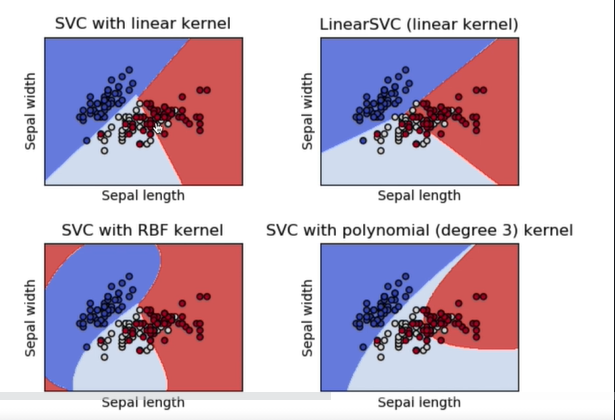

In [3]:
datas = pd.read_csv("veriler.csv")
datas

,ulke,boy,kilo,yas,cinsiyet
0,tr,130,30,10,e
1,tr,125,36,11,e
2,tr,135,34,10,k
3,tr,133,30,9,k
4,tr,129,38,12,e
5,tr,180,90,30,e
6,tr,190,80,25,e
7,tr,175,90,35,e
8,tr,177,60,22,k
9,us,185,105,33,e


In [4]:
bky = datas.iloc[:, 1:4]
cins = datas.iloc[:, -1]

In [5]:
#farklı fonksiyonlardan linear'ı kullanıyoruz.
svc = SVC(kernel='linear')
xtrain, xtest, ytrain, ytest = train_test_split(bky, cins, test_size=0.33, random_state=0)
ss = StandardScaler()
xtrain = ss.fit_transform(xtrain)
xtest = ss.transform(xtest)

In [6]:
svc.fit(xtrain, ytrain)
ypred = svc.predict(xtest)
print(ytest)
print(ypred)

20    k
10    k
14    k
13    k
1     e
21    k
11    k
19    k
Name: cinsiyet, dtype: object
['e' 'e' 'e' 'e' 'k' 'e' 'e' 'k']


In [7]:
#linear, poly, rbf, sigmoid fonksiyonlarından en doğru sonuç veren rbf fonksiyon! 3 sonucu doğru tahmin ediyor!
cm = confusion_matrix(ytest, ypred)
cm

array([[0, 1],
       [6, 1]], dtype=int64)

# SVM ve Kernel Hilesi (Kernel Trick)

**Soft margin ve hard margin olarak iki çeşit marjin var. Soft margin, marjin noktalarının içerisine veri noktası girebilir. Bunu hata olarak kabul eder ve iyileştirmeye çalışır. Hard marginde ise marjin noktalarının içinde hiçbir şekilde veri noktası olamaz.**

**Doğrusal olmayan örneklerde kernel trick kullanırız. Yani marjin noktaları ayıramayız.**

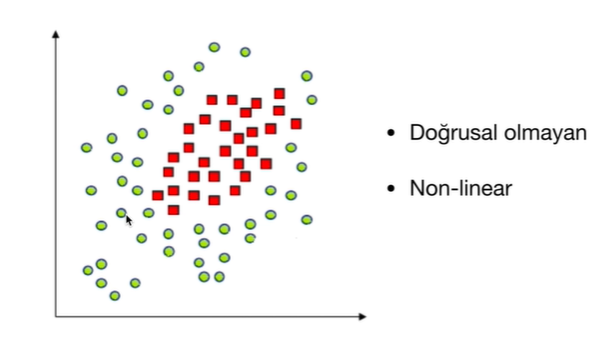

**Burada içeride bulunan kırmızı noktaları kendi arasında gruplandırmak lazım. Kırmızıların tam orta noktasını yakalyıp mesafeye göre uzaklıkları çarparsak daha uzaktakiler daha yakında, daha yakındakiler de daha uzakta olur. Bir 3. boyut oluşturmuş oluruz.**

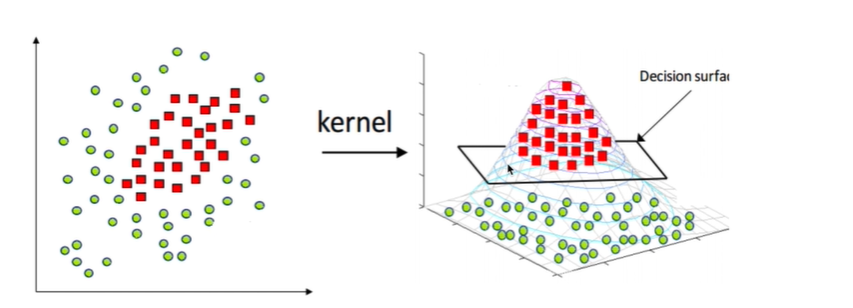

**Daha sonra decision surface olan yeri çiziyoruz. z noktasından kesiyoruz ve altta kalanlar, üstte kalanlar olarak ayırıyoruz.**

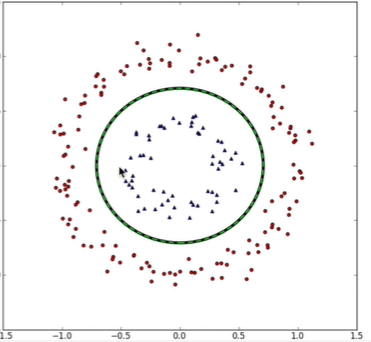

**2 boyutlu uzayda böyle gözükür.**

**Bu ortadan çekme işlemini elde etmek için Rbf kullanırız. (gauss fonksiyonu)**

**Bu z değeri ile oynayarak dairenin yukarı veya aşağı oynamasını sağlayabiliriz.**

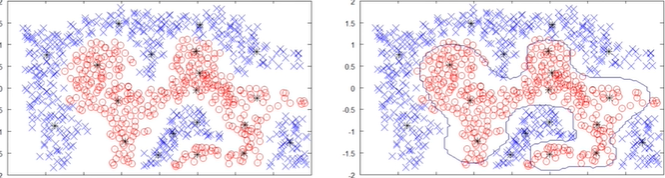

**Şekildeki gibi düzgün dağıtılamayan bir veri kümesi varsa bu durumu elimizde birden fazla kernel kullanarak çözebiliriz.**